# Machine Hack  - Book Price Prediction (Final Score = 0.73)

## Data Description

The so-called paradoxes of an author, to which a reader takes exception, often exist not in the author's book at all, but rather in the reader's head. - Friedrich Nietzsche Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else. Here we explore a big database of books. Books of different genres, from thousands of authors. In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. 

**Size of training set:** 6237 records 

**Size of test set:** 1560 records 

**FEATURES:** 

   * Title:        The title of the book 
   * Author:       The author(s) of the book. 
   * Edition:      The edition of the book eg (Paperback,– Import, 26 Apr 2018) 
   * Reviews:      The customer reviews about the book 
   * Ratings:      The customer ratings of the book 
   * Synopsis:     The synopsis of the book 
   * Genre:        The genre the book belongs to 
   * BookCategory: The department the book is usually available at. 
   * Price:        The price of the book (Target variable)

## Import packages and libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from afinn import Afinn
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, f1_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,  StratifiedKFold,KFold
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

**Load train and test datasets and sample submission file**

In [2]:
train = pd.read_excel('/Users/louietran/Downloads/Machine Hack - Book Price Prediction/BookPrice_Train.xlsx')
og = train.copy(deep=True)
test = pd.read_excel('/Users/louietran/Downloads/Machine Hack - Book Price Prediction/BookPrice_Test.xlsx')


In [147]:
submission = pd.read_excel('/Users/louietran/Downloads/Machine Hack - Book Price Prediction/BookPrice_Sample_Submission.xlsx')


### Preliminary Analysis

In [227]:
train.shape

(6237, 9)

In [230]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [234]:
train.describe(exclude=np.number)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,6237,6237,6237,6237,6237,6237,6237,6237
unique,5568,3679,3370,36,342,5549,345,11
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure
freq,4,69,48,1375,1040,8,947,818


In [220]:
test.shape

(1560, 8)

In [221]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [224]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [225]:
test.describe()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Guardian Pick for 2019\nThe People vs. Putin...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


## Initial Impression

   1. Both train and test datasets don't have missing values. 
    
   2. There are a lot of information to unpack from the current features of the dataset:
    
        * A book can have multiple authors, genres and categories. Therefore, a question can be asked here is that do the amount of co-authors the books have and the total genres and categories they belong to have any thing to do with their prices?
        
        * The **Edition** column has three types of information to extract:  1. The type of the book (Hardcover, Paperback, etc.). 2. Any special features the book has(Import, Limited Edition, etc.) 3. When the book was published 
        
        * Columns **Reviews** and **Ratings** are labeled wrong
        
        * Does the sentiment of a book's synopsis and title affects its price?
        
        * What should be done to data points which have similar to exact information? 
        

## 1. Data Cleaning

**Convert string to numeric data**

In [3]:
def string_to_num(data):
    for index, row in data.iterrows():
        data.loc[index,'Average Rating'] = float(''.join(re.findall("[0-9].[0-9]", data.loc[index,'Reviews'])))
        data.loc[index,'Total Reviews'] = float(''.join(re.findall("[0-9]", data.loc[index,'Ratings'])))

**Count number of authors per book**

In [4]:
authors_list_1 = list(train.Author)
authors_list_2 = list(test.Author)

authors_list_1.extend(authors_list_2)
authors_list = [i.split(",") for i in authors_list_1]

Max = 1
for i in authors_list:
  if len(i) >= Max:
    Max = len(i)
print(Max)

7


In [5]:
def count_authors(data):
    data['Author'] = data.apply(lambda x: x['Author'].split(',',6),axis=1)
    data['Total Authors'] = [len(i) for i in data['Author']]

**Separate Edition Column**

In [6]:
edition_list_1 = list(train.Edition)
edition_list_2 = list(test.Edition)

edition_list_1.extend(edition_list_2)
edition_list = [i.split(",") for i in edition_list_1]

maximum = 1
for i in edition_list:
  if len(i) >= maximum:
    maximum = len(i)
print(maximum)

4


**Convert string to date**

In [7]:
def to_datetime(data):
    for index,row in data.iterrows():
        data.loc[index,'Publication Time'] = pd.to_datetime(data.loc[index,'Publication Time'],format='%d %b %Y',errors='coerce') 

**Split Edition Column**

In [8]:
def split_edition(data):
    data['Edition'] = data.apply(lambda x: x['Edition'].split(',',3),axis=1)
    for index, row in data.iterrows():
        data.loc[index,'Type'] = data.loc[index,'Edition'][0]
        data.loc[index,'Publication Time'] = data.loc[index,'Edition'][-1]
        data['Publication Time'] = data['Publication Time'].str.replace('– ','')
        if len(data.loc[index,'Edition']) > 2:
            data.loc[index,'Special Features'] = 1
        else: 
            data.loc[index,'Special Features'] = 0
            
    data.Type = ['Paperback' if 'Paperback' in Type 
                                 else 'Hardcover' if 'Hardcover' in Type
                                     else 'Others'
                                         for Type in data.Type ]

**Count total genres**

In [9]:
genre_list_1 = list(train.Genre)
genre_list_2 = list(test.Genre)

genre_list_1.extend(genre_list_2)
genre_list = [i.split(",") for i in genre_list_1]

m = 1
for i in genre_list:
  if len(i) >= m:
    m = len(i)
print(m)

2


In [10]:
def count_genre(data):
    data['Genre'] = data.apply(lambda x: x['Genre'].split(',',1),axis=1)
    for index, row in data.iterrows():
        data.loc[index,'Total Genres'] = len(data.loc[index,'Genre'])
    

**Sentiment Analysis**

In [11]:
def sentiment_score(data):
    af = Afinn()
    syn_sentiment = [af.score(syn) for syn in data['Synopsis']]
    syn_sentiment = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in syn_sentiment]
    title_sentiment = [af.score(title) for title in data['Title']]
    title_sentiment = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in title_sentiment]
    return(syn_sentiment,title_sentiment)
    

**Split Category Column**

In [12]:
#Identifying the maximum number of Categories for a single book from the given datasets

cat_1 = list(train['BookCategory'])
cat_2 = list(test['BookCategory'])

cat_1.extend(cat_2)
cat_lis = [i.split(",") for i in cat_1]

max = 1
for i in cat_lis:
  if len(i) >= max:
    max = len(i)
print("Max. number of Categories for a single boook = ",max)

all_categories = [cat.strip().upper() for listin in cat_lis for cat in listin]

Max. number of Categories for a single boook =  2


In [13]:
def split_categories(data):
  cat = list(data)
  C1 = []
  C2 = []
  for i in cat:
    try :
      C1.append(i.split(',')[0].strip().upper())
    except :
      C1.append('NONE')
    try :
      C2.append(i.split(',')[1].strip().upper())
    except :
      C2.append('NONE')
  return C1,C2
  
all_categories.append('NONE')

**Comebine all functions into one**

In [14]:
def data_transformer(data):
    #Cleaning reviews and ratings columns
    string_to_num(data)
    
    #Count total authors
    data['Author'] = data.apply(lambda x: x['Author'].split(',',6),axis=1)
    data['Total Authors'] = [len(i) for i in data['Author']]
    
    #Split Edition column
    split_edition(data)
    
    #Convert to datetime
    to_datetime(data)
    data['Month'] = [i.month for i in data['Publication Time']]
    data['Year'] = [i.year for i in data['Publication Time']]
    
    #Count total genre
    count_genre(data)
    
    #Sentiment of Synopsis and title columns
    syn_sentiment,title_sentiment = sentiment_score(data)
    data['Synopsis Sentiment'] = syn_sentiment
    data['Title Sentiment'] = title_sentiment
    
    #Split categories
    c1,c2 = split_categories(data['BookCategory'])
    data['Category_1'] = c1
    data['Category_2'] = c2
    
    return data
    

In [15]:
train = data_transformer(train)

In [17]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Average Rating,...,Type,Publication Time,Special Features,Month,Year,Total Genres,Synopsis Sentiment,Title Sentiment,Category_1,Category_2
0,The Prisoner's Gold (The Hunters 3),[Chris Kuzneski],"[Paperback, – 10 Mar 2016]",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,[Action & Adventure (Books)],Action & Adventure,220.00,4.0,...,Paperback,2016-03-10 00:00:00,0.0,3.0,2016.0,1.0,positive,neutral,ACTION & ADVENTURE,NONE
1,Guru Dutt: A Tragedy in Three Acts,[Arun Khopkar],"[Paperback, – 7 Nov 2012]",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,[Cinema & Broadcast (Books)],"Biographies, Diaries & True Accounts",202.93,3.9,...,Paperback,2012-11-07 00:00:00,0.0,11.0,2012.0,1.0,positive,negative,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS
2,Leviathan (Penguin Classics),[Thomas Hobbes],"[Paperback, – 25 Feb 1982]",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",[International Relations],Humour,299.00,4.8,...,Paperback,1982-02-25 00:00:00,0.0,2.0,1982.0,1.0,positive,neutral,HUMOUR,NONE
3,A Pocket Full of Rye (Miss Marple),[Agatha Christie],"[Paperback, – 5 Oct 2017]",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,[Contemporary Fiction (Books)],"Crime, Thriller & Mystery",180.00,4.1,...,Paperback,2017-10-05 00:00:00,0.0,10.0,2017.0,1.0,negative,negative,CRIME,THRILLER & MYSTERY
4,LIFE 70 Years of Extraordinary Photography,[Editors of Life],"[Hardcover, – 10 Oct 2006]",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",[Photography Textbooks],"Arts, Film & Photography",965.62,5.0,...,Hardcover,2006-10-10 00:00:00,0.0,10.0,2006.0,1.0,positive,neutral,ARTS,FILM & PHOTOGRAPHY


**Drop unecessary features after transformation**

In [18]:
train_red = train.drop(['Title','Author','Edition','Reviews','Ratings','Synopsis','Genre','BookCategory','Publication Time'],axis=1)

In [19]:
train_red.head()

,Price,Average Rating,Total Reviews,Total Authors,Type,Special Features,Month,Year,Total Genres,Synopsis Sentiment,Title Sentiment,Category_1,Category_2
0,220.00,4.0,8.0,1,Paperback,0.0,3.0,2016.0,1.0,positive,neutral,ACTION & ADVENTURE,NONE
1,202.93,3.9,14.0,1,Paperback,0.0,11.0,2012.0,1.0,positive,negative,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS
2,299.00,4.8,6.0,1,Paperback,0.0,2.0,1982.0,1.0,positive,neutral,HUMOUR,NONE
3,180.00,4.1,13.0,1,Paperback,0.0,10.0,2017.0,1.0,negative,negative,CRIME,THRILLER & MYSTERY
4,965.62,5.0,1.0,1,Hardcover,0.0,10.0,2006.0,1.0,positive,neutral,ARTS,FILM & PHOTOGRAPHY


In [20]:
train_red.Month = train_red.Month.fillna(train_red.Month.median())

In [21]:
train_red.Year = train_red.Year.fillna(train_red.Year.median())

### What was done to the original data set?

   1. I cleansed columns **Ratings** and **Reviews** to only obtain the numeric values
   2. I decided to only use the total authors each book has and deleted the orinal feature
   3. I split **Edition** column into four features: Month of Publication, Year of Publication, Type of the book, and Special Features (0: No special features, 1: There is at least one special feature)
   4. I performed a basic sentiment analysis on both **Title** and **Sysnopsis** columns and divided their sentiment scores as neutral (0), positive (>0), negative (<0)
   5. I split **BookCategory** column into two features: Category_1 and Category_2

## 2. Exploratory Data Analysis

**a. Target Variable Distribution**

<AxesSubplot:xlabel='Price', ylabel='Count'>

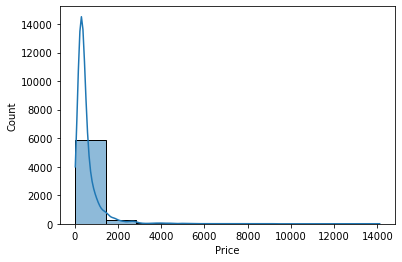

In [22]:
sns.histplot(train_red['Price'],kde=True,bins=10)

Because the Price data is very skewed originally and would impact the accuracy of our machine learning models,  i would use np.log1p() on Price instead!

<AxesSubplot:xlabel='Price', ylabel='Count'>

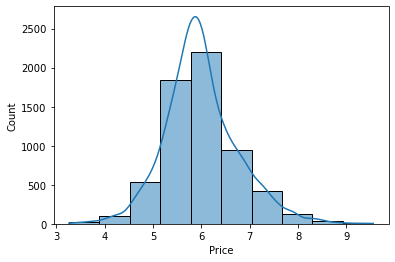

In [23]:
sns.histplot(np.log1p(train_red['Price']),bins=10,kde=True)

**b. Categorical Variables**

In [25]:
cat_columns =['Total Authors','Total Genres','Type','Special Features','Synopsis Sentiment','Title Sentiment','Category_1','Category_2']
num_columns = ['Average Rating','Total Reviews']

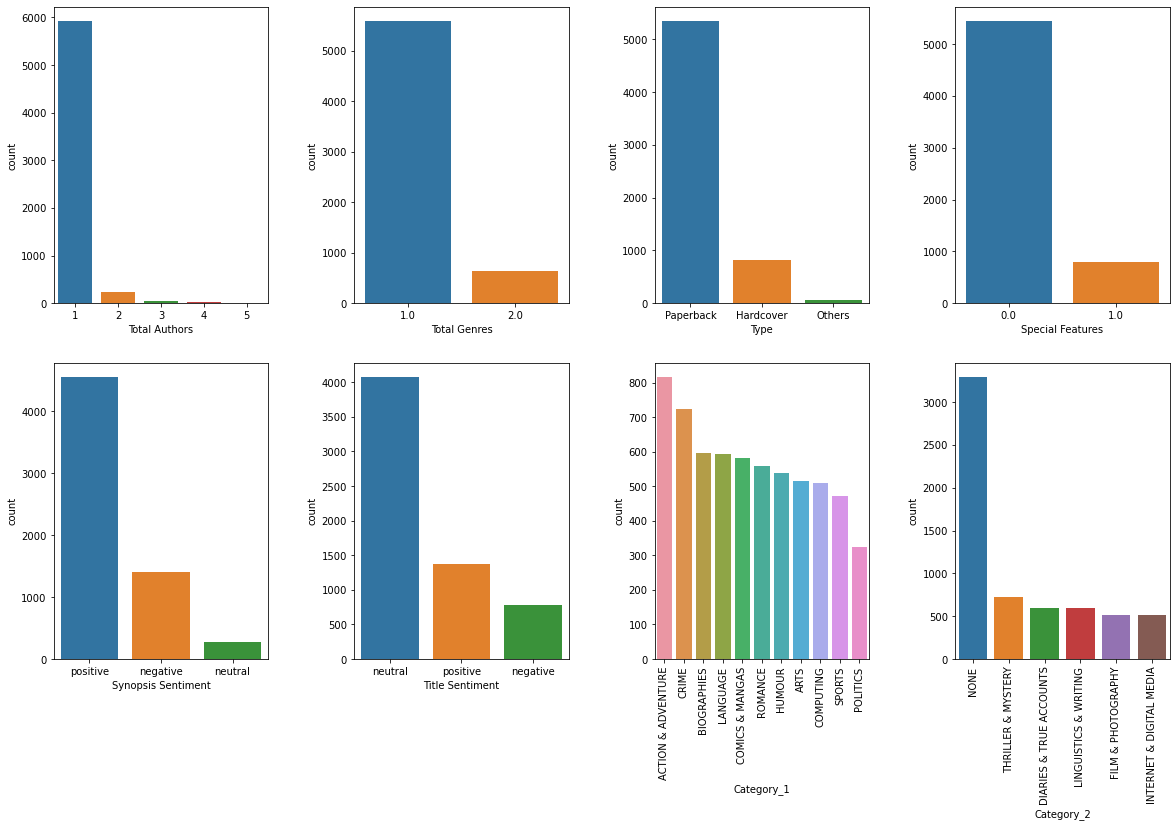

In [154]:
#  Categorical Data
a = 2  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,12))
plt.subplots_adjust(wspace=0.4)

for i in cat_columns:
    plt.subplot(a, b, c)
    #plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.countplot(train_red[i],order = train_red[i].value_counts().index)
    if i in ['Category_1','Category_2']:
        plt.xticks(rotation=90)
    c = c + 1
plt.show()

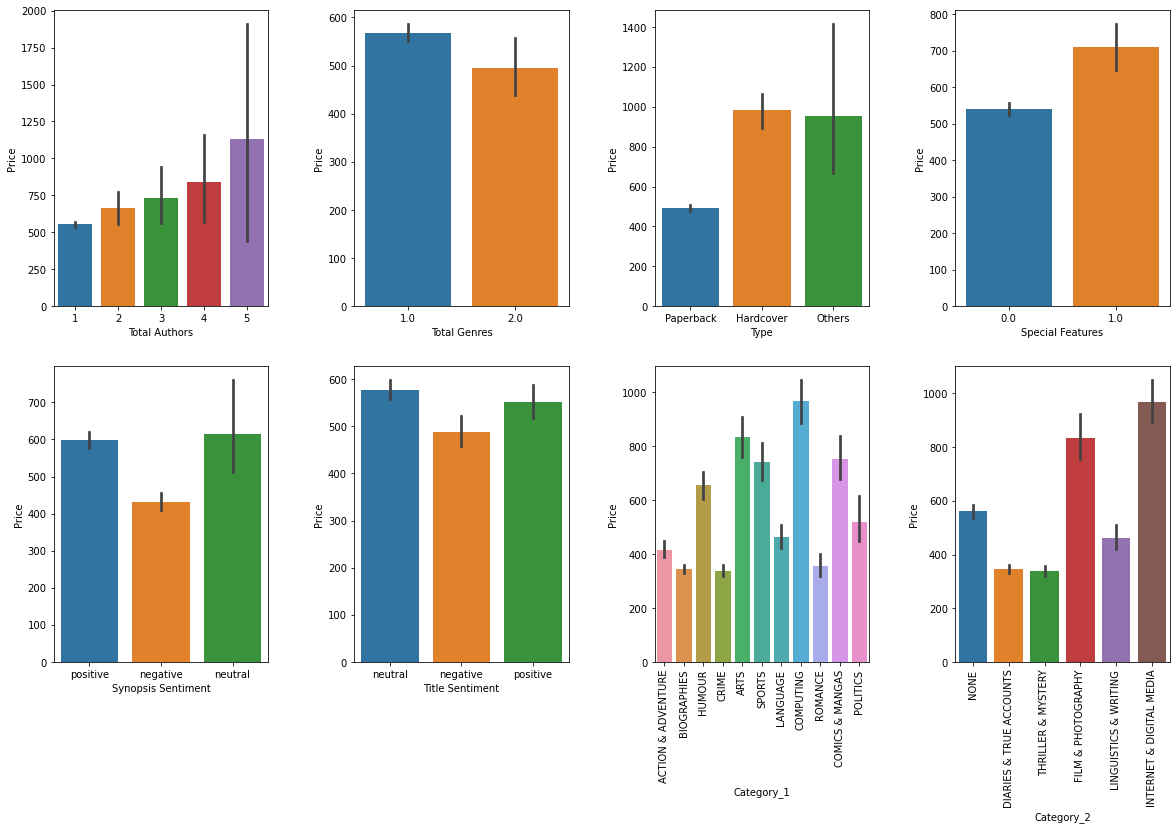

In [155]:
#  Categorical Data
a = 2  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,12))
plt.subplots_adjust(wspace=0.4)

for i in cat_columns:
    plt.subplot(a, b, c)
    #plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.barplot(x=train_red[i],y=train_red['Price'])
    if i in ['Category_1','Category_2']:
        plt.xticks(rotation=90)
    c = c + 1

plt.show()

Based on the graphs above, we can draw some takeaways:
   * Even though most books only have one others but on average, co-authored books tend to be set at a higher price. 
   * Similar to that, books that come in with some special features are also marked at a higher price than those without. 
   * Books' titles and synopsis mostly convey neutral and positive sentiment and books with negative title/synopsis have much lower prices than the other two. 
   * A book's total genres does not seem to affect its pricing. 

In [315]:
sns.set()
train_red.groupby(['Year','Month'])['Price'].mean()

Year    Month
1900.0  3.0      5253.000000
1905.0  7.0       658.000000
1960.0  1.0      1400.000000
        6.0       499.000000
1961.0  10.0      304.000000
                    ...     
2019.0  4.0       319.261098
        5.0       405.296098
        6.0       373.567000
        7.0       345.666667
        10.0      304.000000
Name: Price, Length: 421, dtype: float64

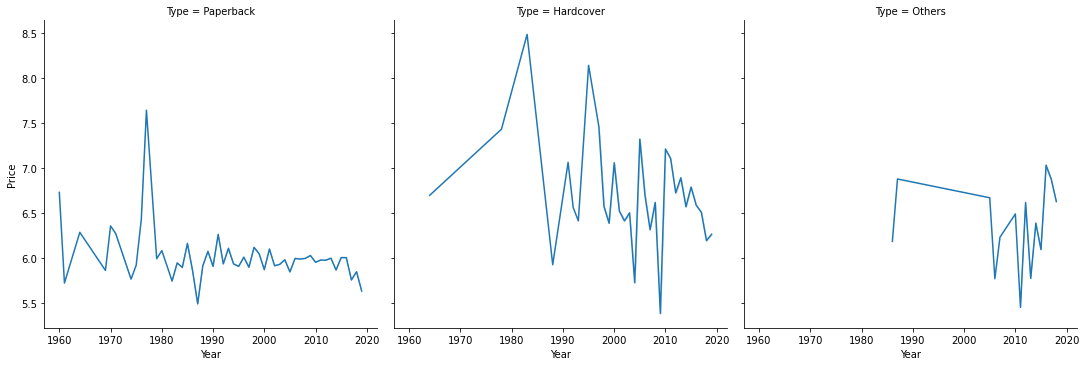

In [103]:
sns.relplot(x=train_red.Year[(train_red.Year >= 1960)],y=np.log1p(train_red['Price']),data=train_red,kind='line',col='Type',ci=False)

From the graphs above, hardcover books most of the time yield a higer price than paperback books even though their price points have been fluctuating a lot. Paperback books have been remaining relatively stable since 1990 with a trend of decreasing after 2015. 

## 3. Data Scaling and Dummification

In [104]:
test = data_transformer(test)

In [105]:
test_red = test.drop(['Title','Author','Edition','Reviews','Ratings','Synopsis','Genre','BookCategory','Publication Time'],axis=1)

In [106]:
test_red.Month = test_red.Month.fillna(test_red.Month.median())
test_red.Year = test_red.Year.fillna(test_red.Year.median())

In [107]:
test_red.head()

,Average Rating,Total Reviews,Total Authors,Type,Special Features,Month,Year,Total Genres,Synopsis Sentiment,Title Sentiment,Category_1,Category_2
0,4.4,960.0,1,Paperback,0.0,10.0,1986.0,1.0,positive,neutral,CRIME,THRILLER & MYSTERY
1,5.0,1.0,1,Paperback,1.0,7.0,2014.0,1.0,positive,neutral,COMPUTING,INTERNET & DIGITAL MEDIA
2,5.0,4.0,1,Paperback,0.0,3.0,2011.0,1.0,positive,positive,ROMANCE,NONE
3,4.1,11.0,1,Paperback,0.0,7.0,2014.0,1.0,positive,positive,COMPUTING,INTERNET & DIGITAL MEDIA
4,4.4,9.0,1,Paperback,0.0,12.0,2011.0,1.0,neutral,positive,LANGUAGE,LINGUISTICS & WRITING


In [108]:
X = pd.get_dummies(train_red)
X = X.drop('Price',axis=1)
test_scaled = pd.get_dummies(test_red)

scaler = StandardScaler()
for c in ['Average Rating','Total Reviews','Month','Year']:
    scaler = StandardScaler().fit(X[[c]])
    X[c] = scaler.transform(X[[c]])
    test_scaled[c] = scaler.transform(test_scaled[[c]])

In [109]:
y = np.log1p(train_red['Price'])

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1103)

In [111]:
X_train.head()

,Average Rating,Total Reviews,Total Authors,Special Features,Month,Year,Total Genres,Type_Hardcover,Type_Others,Type_Paperback,...,Category_1_LANGUAGE,Category_1_POLITICS,Category_1_ROMANCE,Category_1_SPORTS,Category_2_DIARIES & TRUE ACCOUNTS,Category_2_FILM & PHOTOGRAPHY,Category_2_INTERNET & DIGITAL MEDIA,Category_2_LINGUISTICS & WRITING,Category_2_NONE,Category_2_THRILLER & MYSTERY
1723,-0.291648,-0.179916,1,0.0,-0.204543,0.688110,1.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2790,0.765038,-0.206585,1,0.0,0.745842,-0.114360,1.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3766,0.614083,-0.159913,1,1.0,0.112252,0.286875,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1204,0.161217,-0.126576,1,0.0,1.379431,0.286875,1.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4148,-0.442603,-0.233255,1,0.0,0.429047,-1.184320,1.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


#### Without Tunning

In [112]:
rf = RandomForestRegressor(random_state=1103)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [113]:
test_scaled.head()

,Average Rating,Total Reviews,Total Authors,Special Features,Month,Year,Total Genres,Type_Hardcover,Type_Others,Type_Paperback,...,Category_1_LANGUAGE,Category_1_POLITICS,Category_1_ROMANCE,Category_1_SPORTS,Category_2_DIARIES & TRUE ACCOUNTS,Category_2_FILM & PHOTOGRAPHY,Category_2_INTERNET & DIGITAL MEDIA,Category_2_LINGUISTICS & WRITING,Category_2_NONE,Category_2_THRILLER & MYSTERY
0,0.161217,6.160803,1,0.0,1.062637,-3.457984,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.066948,-0.233255,1,1.0,0.112252,0.286875,1.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1.066948,-0.213253,1,0.0,-1.154927,-0.114360,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,-0.291648,-0.166581,1,0.0,0.112252,0.286875,1.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.161217,-0.179916,1,0.0,1.696226,-0.114360,1.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [114]:
test_pred = np.expm1(rf.predict(test_scaled))

In [115]:
np.sqrt(mean_squared_error(y_pred,y_test))

0.6490527031178326

In [460]:
score_before_tunning = 0.71921 

#### Hyperparameters Tunning

In [141]:
n_estimators = [300]
max_depth = [12]
min_samples_split = [10]
min_samples_leaf = [2]
max_features = [10]
rf_grid = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
kfold = KFold(n_splits=10, shuffle=True, random_state=1103)

rf_cv = GridSearchCV(rf, param_grid=rf_grid, scoring="neg_mean_squared_log_error", n_jobs=-1, cv=kfold)
rf_result = rf_cv.fit(X_train, y_train)

In [140]:
#summarize results
print("Best: %f using %s" % (rf_result.best_score_, rf_result.best_params_))
means = rf_result.cv_results_['mean_test_score']
stds = rf_result.cv_results_['std_test_score']
params = rf_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.008076 using {'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
-0.008166 (0.000765) with: {'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
-0.008115 (0.000777) with: {'max_depth': 12, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
-0.008076 (0.000786) with: {'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [142]:
y_pred_2 = rf_cv.predict(X_test)

In [143]:
np.sqrt(mean_squared_error(y_pred_2,y_test))

0.6414761908698979

In [144]:
np.sqrt(mean_squared_error(y_pred,y_test))

0.6490527031178326

In [145]:
test_pred_2 = np.expm1(rf_cv.predict(test_scaled))

In [148]:
submission['Price'] = test_pred_2
submission.to_csv('/Users/louietran/Downloads/Machine Hack - Book Price Prediction/final_submission.csv')

In [167]:
rf_score_tuned = 0.73041


### b. XGBoost

In [593]:
xgr = xgb.XGBRegressor(objective='reg:squarederror',random_state=1103)

In [594]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1103,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [595]:
y_pred_xgr = xgr.predict(X_test)

In [596]:
test_pred_xgr = np.expm1(xgr.predict(test_scaled))

In [597]:
np.sqrt(mean_squared_error(y_pred_xgr,y_test))

0.6533289196558906

In [533]:
submission['Price'] =test_pred_xgr
submission.to_csv('/Users/louietran/Downloads/Machine Hack - Book Price Prediction/final_submission.csv')

In [534]:
xgr_score_notune = 0.72041

**Hyperparameters Tunning**

In [698]:
n_estimators = [400]
learning_rate = [0.01]
max_depth = [8]
subsample = [0.7]
colsample_bytree = [1.0]
gamma = [1]
reg_alpha =[0.01]

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth,subsample=subsample,colsample_bytree=colsample_bytree,gamma=gamma,reg_alpha=reg_alpha)
kfold = KFold(n_splits=10, shuffle=True, random_state=1103)
grid_search = GridSearchCV(xgr, param_grid, scoring="neg_mean_squared_log_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [700]:
np.sqrt(mean_squared_error(grid_result.predict(X_test),y_test))


0.6452550938267

In [701]:
submission['Price'] =np.expm1(grid_result.predict(test_scaled))
submission.to_csv('/Users/louietran/Downloads/Machine Hack - Book Price Prediction/final_submission.csv')

In [149]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    

NameError: name 'grid_result' is not defined

In [545]:
best_model = xgr_cv.best_estimator_

In [546]:
y_pred_xgr_tuned = best_model.predict(X_test)

In [547]:
np.sqrt(mean_squared_error(y_pred_xgr_tuned,y_test))

0.655882918109153

In [548]:
test_pred_xgr_tuned= np.expm1(xgr_cv.predict(test_scaled))

In [549]:
submission['Price'] =test_pred_xgr_tuned
submission.to_csv('/Users/louietran/Downloads/Machine Hack - Book Price Prediction/final_submission.csv')

In [166]:
xgr_score_tuned = 0.73089

In [175]:
difference = np.round((xgr_score_tuned - rf_score_tuned)*100,3)
print(difference)

0.048


## Conclusion


Based on the results of running two different models and with and without hyperparameters tuning, the XGBoostRegressor beats RandomForestClassifier by 0.048%. While untuned XGBoost performs worse than that of RandomForest, tuned XGBoost does produce a better result. In order to improve the accuracy of my models prediction even more, a more efficient way of processing the raw data needs to be implemented. One thing i could have done or attempted to was to keep the book names or authors' name since they might contribute somehow to the price of each book. Another approach can be find a more accurate way to interpret the synopsis. If there were information about authors' gender, age or popularity level, the prices might have been predicted more correctly.